<H1>Analiza dużych zbiorów danych - test zaliczeniowy</H1>
<p>Studia podyplomowe 2023/2024<br>
    Data: 26.05.2024
</p>

<H3>Student:</H3>
<p>Aleksandra Sendecka</p>

<h5>1. Proszę utworzyć przykładowy DataFrame w Spark. Schemat i dane proszę wprowadzić ręcznie. Zbiór powinien zawierać 5 wierszy i 3 kolumny. Co najmniej jedna kolumna powinna być typu String i jedna numeryczna. Nazwy kolumn i wprowadzone wartości mogą być dowolne.</h5>

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType

ModuleNotFoundError: No module named 'pyspark'

In [44]:
# Utworzenie sesji Spark
spark = SparkSession.builder \
    .appName("Przykladowy DataFrame") \
    .getOrCreate()

In [45]:
# Definicja schematu DataFrame
schema = StructType([
    StructField("Name", StringType(), True),
    StructField("Age", IntegerType(), True),
    StructField("Salary", FloatType(), True)
])

In [46]:
# Dane do DataFrame
data = [
    ("Alice", 30, 4000.5),
    ("Bob", 25, 3500.0),
    ("Charlie", 35, 4500.75),
    ("David", 28, 3900.0),
    ("Eva", 22, 3200.25)
]

In [47]:
# Utworzenie DataFrame
df_spark = spark.createDataFrame(data, schema)

In [53]:
# Wyświetlenie DataFrame
df_spark.show()
df_spark = df.toPandas()
print(df_spark)

ModuleNotFoundError: No module named 'distutils'

<h5>2. Prosze utworzyć Pandas DataFrame z pliku: "sample_data.csv" zawierającego dane ze stacji meteorologicznej.<br> 
    a) Odnaleźć zmienne wysoko skorelowane i narysować dla nich wykresy modeli regresji liniowej.<br>
    b) Na wykresach umieścić wartość współczynnika korelacji, którego dotyczą.
</h5>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Wczytanie danych z pliku CSV
file_path = 'sample_data.csv'
d_f = pd.read_csv(file_path, parse_dates=['DateTime'])

In [5]:
# Wyświetlenie pierwszych kilku wierszy danych
print(d_f.head())

             DateTime  Temperature   Humidity  WindSpeed  SolarRadiation  \
0 2020-07-07 00:00:00    15.866667  87.666667   6.666667               0   
1 2020-07-07 00:30:00    15.800000  82.333333   5.333333               0   
2 2020-07-07 01:00:00    15.066667  82.666667   3.333333               0   
3 2020-07-07 01:30:00    15.000000  81.000000   6.000000               0   
4 2020-07-07 02:00:00    15.066667  77.666667   8.000000               0   

   Rain     Pressure  
0   0.0  1002.400000  
1   0.0  1002.400000  
2   0.0  1001.633333  
3   0.0  1002.133333  
4   0.0  1002.633333  


In [6]:
# Znalezienie macierzy korelacji
correlation_matrix = d_f.corr()
correlation_matrix

,DateTime,Temperature,Humidity,WindSpeed,SolarRadiation,Rain,Pressure
DateTime,1.000000,-0.156504,0.102777,0.122787,-0.122018,0.030695,-0.030863
Temperature,-0.156504,1.000000,-0.802544,0.354068,0.606324,-0.033953,-0.142875
Humidity,0.102777,-0.802544,1.000000,-0.426044,-0.656043,0.120843,-0.123636
WindSpeed,0.122787,0.354068,-0.426044,1.000000,0.423331,0.112827,-0.182511
SolarRadiation,-0.122018,0.606324,-0.656043,0.423331,1.000000,-0.090909,0.121880
Rain,0.030695,-0.033953,0.120843,0.112827,-0.090909,1.000000,-0.157731
Pressure,-0.030863,-0.142875,-0.123636,-0.182511,0.121880,-0.157731,1.000000


In [7]:
# Wysoko skorelowane pary zmiennych
highly_correlated = (correlation_matrix[(correlation_matrix != 1) & (correlation_matrix.abs() > 0.7)]
                     .stack()
                     .reset_index()
                     .rename(columns={0: 'correlation', 'level_0': 'variable1', 'level_1': 'variable2'}))

In [8]:
# Wyświetlenie wysoko skorelowanych zmiennych
print("Wysoko skorelowane pary zmiennych:")
print(highly_correlated)

Wysoko skorelowane pary zmiennych:
     variable1    variable2  correlation
0  Temperature     Humidity    -0.802544
1     Humidity  Temperature    -0.802544


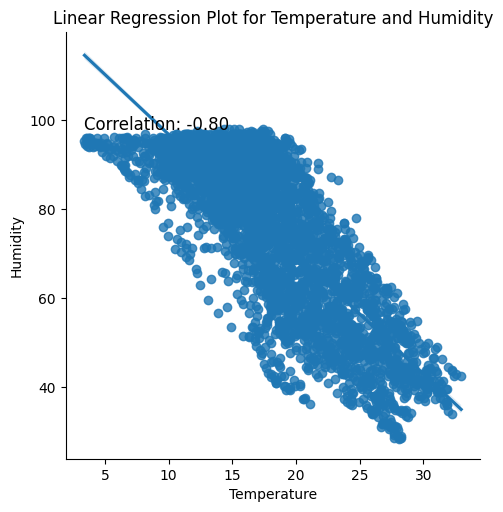

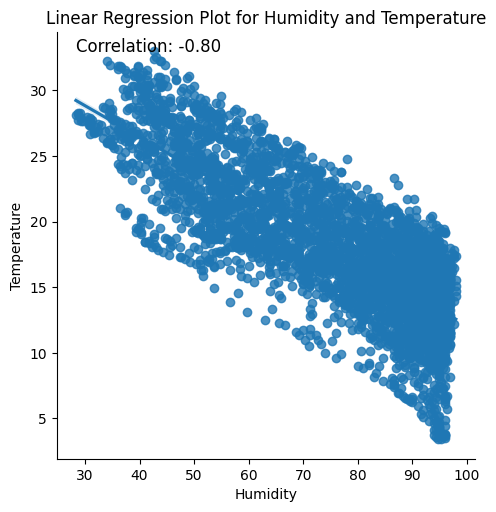

In [9]:
# Narysowanie wykresów modeli regresji liniowej
for index, row in highly_correlated.iterrows():
    var1 = row['variable1']
    var2 = row['variable2']
    
    # Wykres rozrzutu z regresją liniową
    sns.lmplot(x=var1, y=var2, data=d_f)
    
    # Obliczenie współczynnika korelacji
    correlation_coefficient = correlation_matrix.loc[var1, var2]
    
    # Umieszczenie wartości współczynnika korelacji na wykresie
    plt.text(d_f[var1].min(), d_f[var2].max(), f"Correlation: {correlation_coefficient:.2f}", fontsize=12)
    
    # Ustawienie tytułu i etykiet osi
    plt.title(f"Linear Regression Plot for {var1} and {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    
    # Pokazanie wykresu
    plt.show()

<h5>3. Proszę użyć DataFrame utworzonego z pliku: "sample_data.csv". <br>
a) Obliczyć średnią dzienną temperaturę (dla każdego dnia w całym zbiorze danych), wynik przedstawić w formie tabelarycznej.<br>
    b) Narysować wykres słupkowy ilustrujący dzienną średnią temperaturę.
</h5>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Wczytanie danych z pliku CSV
file_path = 'sample_data.csv'
df3 = pd.read_csv(file_path)
print(df3.head())

              DateTime  Temperature   Humidity  WindSpeed  SolarRadiation  \
0  2020-07-07 00:00:00    15.866667  87.666667   6.666667               0   
1  2020-07-07 00:30:00    15.800000  82.333333   5.333333               0   
2  2020-07-07 01:00:00    15.066667  82.666667   3.333333               0   
3  2020-07-07 01:30:00    15.000000  81.000000   6.000000               0   
4  2020-07-07 02:00:00    15.066667  77.666667   8.000000               0   

   Rain     Pressure  
0   0.0  1002.400000  
1   0.0  1002.400000  
2   0.0  1001.633333  
3   0.0  1002.133333  
4   0.0  1002.633333  


In [16]:
# Przekształcenie kolumny z datą na odpowiedni format
df3['DateTime'] = pd.to_datetime(df3['DateTime'])

In [17]:
# Obliczenie średniej dziennej temperatury
daily_mean_temperature = df3.groupby(df3['DateTime'].dt.date)['Temperature'].mean().reset_index()
daily_mean_temperature.columns = ['DateTime', 'mean_temperature']

In [18]:
# Przedstawienie wyników w formie tabelarycznej
print(daily_mean_temperature)

      DateTime  mean_temperature
0   2020-07-07         15.240799
1   2020-07-08         14.019444
2   2020-07-09         16.456771
3   2020-07-10         21.240972
4   2020-07-11         14.719444
..         ...               ...
78  2020-09-23         17.529687
79  2020-09-24         17.482465
80  2020-09-25         18.648611
81  2020-09-26         18.411458
82  2020-09-27         11.969333

[83 rows x 2 columns]


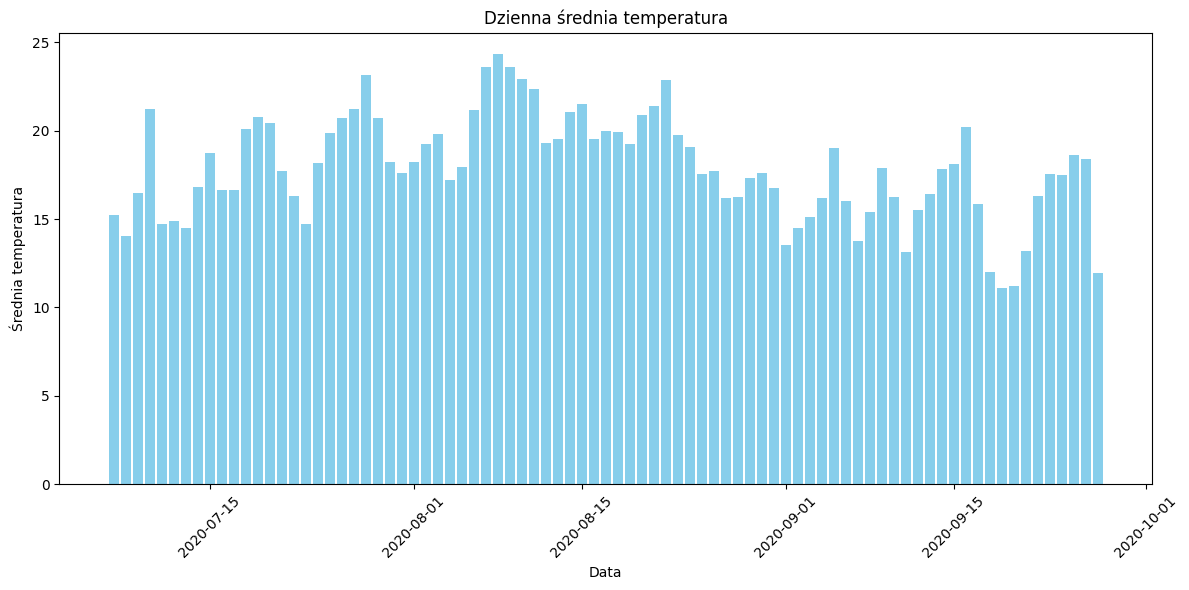

In [19]:
# Narysowanie wykresu słupkowego ilustrującego dzienną średnią temperaturę
plt.figure(figsize=(12, 6))
plt.bar(daily_mean_temperature['DateTime'], daily_mean_temperature['mean_temperature'], color='skyblue')
plt.xlabel('Data')
plt.ylabel('Średnia temperatura')
plt.title('Dzienna średnia temperatura')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h5>4. Wykorzystując DataFrame utworony z pliku: "sample_data.csv", proszę uzyskać informacje:<br>
    a) Jaki był sumaryczny opad w sierpniu? (atrybut "Rain")<br>
    b) Jak wiele deszczowych dni było w sierpniu? (rozróżnić dzień i noc na podstawie wartości "SolarRadiation", nocą przyjmuje ona wartość 0)<br>
    c) Jak wiele deszczowych nocy było w sierpniu?<br>
    d) Krórego dnia sierpnia deszcz padał najdłużej?<br>
</h5>

In [20]:
# Filtrowanie danych dla sierpnia
df_august = df[df['DateTime'].dt.month == 8]

In [21]:
# a) Obliczenie sumarycznego opadu w sierpniu
total_rain_august = df_august['Rain'].sum()
total_rain_august

69.6

In [22]:
# b) Jak wiele deszczowych dni było w sierpniu?
df_august['is_day'] = df_august['SolarRadiation'] > 0
rainy_days = df_august[df_august['Rain'] > 0].groupby([df_august['DateTime'].dt.date, 'is_day']).size().unstack(fill_value=0)
num_rainy_days = rainy_days[rainy_days[True] > 0].shape[0]
num_rainy_days

/tmp/ipykernel_1869/1368370768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august['is_day'] = df_august['SolarRadiation'] > 0


11

In [23]:
# c) Jak wiele deszczowych nocy było w sierpniu?
num_rainy_nights = rainy_days[rainy_days[False] > 0].shape[0]
num_rainy_nights

8

In [24]:
# d) Którego dnia sierpnia deszcz padał najdłużej?
rainy_hours = df_august[df_august['Rain'] > 0].groupby(df_august['DateTime'].dt.date).size()
longest_rain_day = rainy_hours.idxmax()
longest_rain_day

datetime.date(2020, 8, 30)

In [25]:
longest_rain_duration = rainy_hours.max()
longest_rain_duration

16

<h5>5. Przyjmijmy, że w ramach badań wykonano pomiar współczynnika CRC (Canopy Reflection Coefficient). Wynik pomiaru został zapisany z częstotliwością 10 dni (jak pokazano w tabeli poniżej). Proszę połączyć dane z tej tabeli z danymi ze stacji meteorologicznej (sample_data.csv) w taki sposób, aby każdemu rekordowi została przypisana odpowiednia wartość współczynnika CRC (zależnie od dekady). Dekady należy ustalić zliczając dni następująco: pierwsza dekada: 1-10 dzień miesiąca, druga dekada: 11-20 dzień miesiąca, trzecia: 21-do ostatniego dnia miesiąca (lub końca danych). W przypadku gdy dla danej dekady brakuje wartości CRC należy przyjąć wartość domyślną CRC=0.23.</h5>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th>Month</th>
      <th>Decade</th>
      <th>CRC</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <th>7</th>
      <td>1</td>
      <td>1.2</td>
    </tr>
    <tr>
      <th>7</th>
      <td>2</td>
      <td>1.1</td>
    </tr>
    <tr>
      <th>7</th>
      <td>3</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1</td>
      <td>0.8</td>
    </tr>
    <tr>
      <th>8</th>
      <td>2</td>
      <td>0.6</td>
    </tr>
    <tr>
      <th>8</th>
      <td>3</td>
      <td>0.7</td>
    </tr>

  </tbody>
</table>
Przykładowy wynik powinien wyglądać następująco:<table class="dataframe" border="1">
<thead>
    <tr style="text-align: right;">
        <th></th>
<th>CRC</th>
        <th>DateTime</th>
        <th>Temperature</th>
<th>Humidity</th>
        <th>WindSpeed</th>
        <th>SolarRadiation</th>
<th>Rain</th>
        <th>Pressure</th>
    </tr>
    </thead>
    <tbody>
        <tr>
<th>0</th>
            <td>1.20</td>
            <td>2020-07-07 00:00:00</td>
<td>15.866667</td>
            <td>87.666667</td>
            <td>6.666667</td>
            <td>0</td>
            <td>0.0</td>
<td>1002.400000</td>
        </tr>
        <tr>
            <th>1</th>
            <td>1.20</td>
            <td>2020-07-07 00:30:00</td>
            <td>15.800000</td>
            <td>82.333333</td>
            <td>5.333333</td>
            <td>0</td>
            <td>0.0</td>
            <td>1002.400000</td>
        </tr>
        <tr>
            <th>2</th>
            <td>1.20</td>
<td>2020-07-07 01:00:00</td>
<td>15.066667</td>
<td>82.666667</td>
<td>3.333333</td>
<td>0</td>
<td>0.0</td>
<td>1001.633333</td>
</tr>
<tr>
<th>3</th>
<td>1.20</td>
<td>2020-07-07 01:30:00</td>
<td>15.000000</td>
<td>81.000000</td>
<td>6.000000</td>
<td>0</td>
<td>0.0</td>
<td>1002.133333</td>
</tr>
<tr>
<th>4</th>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
</tr>
</tbody>
</table>

In [26]:
import pandas as pd

In [28]:
# Wczytanie danych z pliku CSV
weather_data = pd.read_csv("sample_data.csv")
weather_data.head()

,DateTime,Temperature,Humidity,WindSpeed,SolarRadiation,Rain,Pressure
0,2020-07-07 00:00:00,15.866667,87.666667,6.666667,0,0.0,1002.400000
1,2020-07-07 00:30:00,15.800000,82.333333,5.333333,0,0.0,1002.400000
2,2020-07-07 01:00:00,15.066667,82.666667,3.333333,0,0.0,1001.633333
3,2020-07-07 01:30:00,15.000000,81.000000,6.000000,0,0.0,1002.133333
4,2020-07-07 02:00:00,15.066667,77.666667,8.000000,0,0.0,1002.633333


In [29]:
# Dane CRC
crc_data = {
    'Month': [7, 7, 7, 8, 8, 8],
    'Decade': [1, 2, 3, 1, 2, 3],
    'CRC': [1.2, 1.1, 1.0, 0.8, 0.6, 0.7]
}

In [30]:
# Utworzenie DataFrame z danymi CRC
crc_df = pd.DataFrame(crc_data)

In [31]:
# Ustalanie dekady dla każdego rekordu meteorologicznego
weather_data['DateTime'] = pd.to_datetime(weather_data['DateTime'])
weather_data['Day'] = weather_data['DateTime'].dt.day
weather_data['Decade'] = pd.cut(weather_data['Day'], bins=[0, 10, 20, 31], labels=[1, 2, 3], right=False)

In [32]:
# Usunięcie rekordów z wartościami NaN w kolumnie "Decade"
weather_data = weather_data.dropna(subset=['Decade'])

In [33]:
# Połączenie danych meteorologicznych z danymi CRC na podstawie dekady
merged_data = pd.merge(weather_data, crc_df, on='Decade', how='left')

In [34]:
# Ustawienie domyślnej wartości CRC=0.23 dla brakujących wartości
merged_data['CRC'] = merged_data['CRC'].fillna(0.23)

In [35]:
# Wyświetlenie wyniku
print(merged_data)

                DateTime  Temperature   Humidity  WindSpeed  SolarRadiation  \
0    2020-07-07 00:00:00    15.866667  87.666667   6.666667               0   
1    2020-07-07 00:00:00    15.866667  87.666667   6.666667               0   
2    2020-07-07 00:30:00    15.800000  82.333333   5.333333               0   
3    2020-07-07 00:30:00    15.800000  82.333333   5.333333               0   
4    2020-07-07 01:00:00    15.066667  82.666667   3.333333               0   
...                  ...          ...        ...        ...             ...   
7725 2020-09-27 11:00:00    10.700000  93.666667  10.000000             131   
7726 2020-09-27 11:30:00    10.633333  93.333333  14.000000             199   
7727 2020-09-27 11:30:00    10.633333  93.333333  14.000000             199   
7728 2020-09-27 12:00:00    10.600000  93.000000  13.333333             209   
7729 2020-09-27 12:00:00    10.600000  93.000000  13.333333             209   

      Rain     Pressure  Day  Decade  Month  CRC  
